In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Social_Network_Ads.csv")

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.shape

(400, 5)

In [7]:
x=df.iloc[:,2:4]
y=df.iloc[:,4]

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,
random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)
print(xtrain[:3])
print('-'*15)
print(xtest[:3])

[[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]]
---------------
[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]]


In [10]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [11]:
logreg=LogisticRegression()

In [12]:
logreg.fit(xtrain,ytrain)
y_pred=logreg.predict(xtest)
print(xtest[:10])
print('-'*15)
print(y_pred[:10])

[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]
 [-1.09058306 -1.44652121]
 [-0.70174008 -1.59138156]
 [-0.21568634  2.14601566]
 [-1.96547978 -0.05586178]
 [ 0.85363187 -0.78016356]]
---------------
[0 0 0 0 0 0 0 1 0 0]


In [13]:
print(y_pred[:20])
print(ytest[:20])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
132    0
309    0
341    0
196    0
246    0
60     0
155    0
261    1
141    0
214    0
37     0
134    0
113    0
348    0
12     0
59     0
293    0
140    0
206    1
199    0
Name: Purchased, dtype: int64


In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,
classification_report,accuracy_score, precision_score, recall_score, f1_score
cm=confusion_matrix(ytest,y_pred)
print(cm)

SyntaxError: trailing comma not allowed without surrounding parentheses (1960699537.py, line 1)

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [27]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


In [28]:
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[57  1]
 [ 5 17]]


In [30]:
matrix= confusion_matrix(ytest,y_pred,labels = logreg.classes_)
print(matrix)
tp, fn, fp, tn = confusion_matrix(ytest,y_pred,labels=[1,0]).reshape(-1)

[[57  1]
 [ 5 17]]


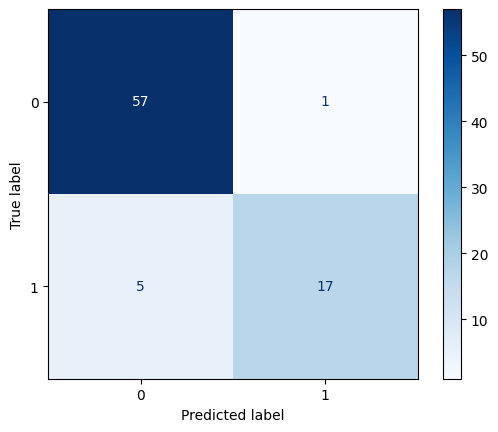

In [31]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,
display_labels=logreg.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [32]:
#visualizing the training set results

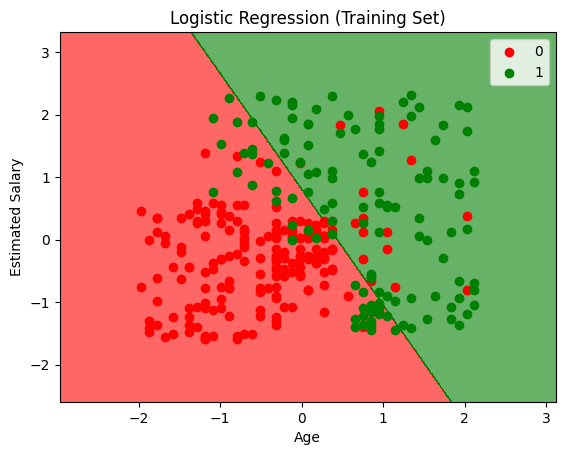

In [33]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

xset, yset = xtrain, ytrain

x1, x2 = np.meshgrid(
    np.arange(start=xset[:, 0].min() - 1, stop=xset[:, 0].max() + 1, step=0.01),
    np.arange(start=xset[:, 1].min() - 1, stop=xset[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1, x2,
    logreg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.6,
    cmap=ListedColormap(('red', 'green'))
)

for i, j in enumerate(np.unique(yset)):
    plt.scatter(
        xset[yset == j, 0],
        xset[yset == j, 1],
        color=ListedColormap(('red', 'green'))(i),
        label=j
    )

plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


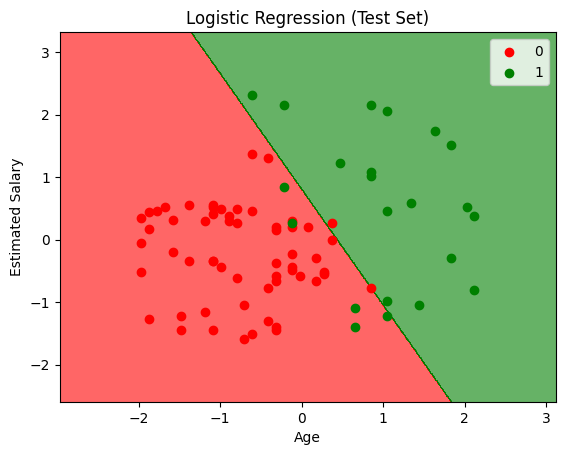

In [34]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

xset, yset = xtest, ytest
x1, x2 = np.meshgrid(
    np.arange(start=xset[:, 0].min() - 1, stop=xset[:, 0].max() + 1, step=0.01),
    np.arange(start=xset[:, 1].min() - 1, stop=xset[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1,
    x2,
    logreg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.6,
    cmap=ListedColormap(('red', 'green'))
)

for i, j in enumerate(np.unique(yset)):
    plt.scatter(
        xset[yset == j, 0],
        xset[yset == j, 1],
        color=ListedColormap(('red', 'green'))(i),
        label=j
    )

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [35]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(ytest,y_pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.93
Error Rate:  0.075
Sensitivity (Recall or True positive rate) : 0.7727272727272727
Specificity (True negative rate) : 0.9827586206896551
Precision (Positive predictive value) : 0.9444444444444444
False Positive Rate : 0.017241379310344827
